Dataset Description

The MPG dataset is technical spec of cars originaly provided from UCI Machine Learning Repository. The data concerns city-cycle fuel consumption in miles per gallon to be analyzed in terms of 3 multivalued discrete and 5 continuous attributes.
Columns Description

    mpg: miles per galon of fuel (continuous variable).
    cylinders: number of engine cylinders (multi-valued discrete variable).
    displacement: (continuous variable)
    horsepower: the power produced by engine to move the car (continuous variable)
    weight: car weight (continuous variable)
    acceleration: the acceleration an engine can get per second (continuous variable)
    model year: car release year from 1970 to 1982(multi-valued discrete variable)
    origin: car manufacturing place (1 -> USA, 2 -> Europe, 3 -> Asia) (multi-valued discrete variable)
    car name: car model name (unique for each instance)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Data Wrangling

We'd load our desired data from the flat csv file auto-mpg.csv to a dataframe using pandas, and display its first 5 records. here, we want to check for:

    Missingness in our dataframe.
    Inconsistent data types.
    Duplicated rows.
    columns to be droped or re-parsed.


In [2]:
auto=pd.read_csv('/content/auto-mpg.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
#identify duplicates
auto.duplicated().sum()

0

In [5]:
#Horsepower has inconsistent data

In [6]:
auto.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [7]:
#count the number of missing values in horsepower column
(auto.horsepower=='?').sum()

6

In [8]:
#It seems like we have 6 values in horsepower column containing ?, and that is what is giving us the object data type instead of int.


Exploring Summary

    Our dataset has a total of 398 records and 9 columns.
    We have no NaNs in our dataset nor duplicated rows.
    horsepower column have inconsistant data type that needs to be handled and casted to int.
    origin would need to be parsed and casted into a categorical datatype.
    No columns would need to be dropped.




Data Cleaning

Here, we'd perform cleaning operations (dropping rows, mapping columns, converting data types). All of which would help us reach a more accurate result in creating meaningful and informative visualizations.
Cleaning horsepower column

We'd drop each row that contains a ? on the horsepower column.


#Cleaning Horsepower column

In [9]:
auto=auto[auto.horsepower !='?']

In [10]:
#confirming the changes
(auto.horsepower=='?').sum()

0

In [11]:
auto['horsepower'].info()

<class 'pandas.core.series.Series'>
Index: 392 entries, 0 to 397
Series name: horsepower
Non-Null Count  Dtype 
--------------  ----- 
392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [12]:
#Casting Horsepower Column (object to int)

In [13]:
auto.horsepower=auto.horsepower.astype(int)
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


Handling origin column

We'd map origin column according to the provided description (1 -> USA, 2 -> Europe, 3 -> Asia), and cast its datatype as category.

In [14]:
# parsing origin column

auto.loc[auto.origin == 1, 'origin'] = 'USA'
auto.loc[auto.origin == 2, 'origin'] = 'Europe'
auto.loc[auto.origin == 3, 'origin'] = 'Asia'

# casting origin column into category
auto['origin'] = auto['origin'].astype('category')

# validating changes
auto['origin'].dtype

<ipython-input-14-f33b3e60ffd7>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'USA' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  auto.loc[auto.origin == 1, 'origin'] = 'USA'


CategoricalDtype(categories=['Asia', 'Europe', 'USA'], ordered=False, categories_dtype=object)

In [15]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,USA,ford torino


#Data seem clean , proceed with Visualization
In this section, i will  use some informative visuals to help  draw insights and conclusions about the data and also help in EDA.

Let's first have a quick look at the summary statistics of our dataset.


In [16]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


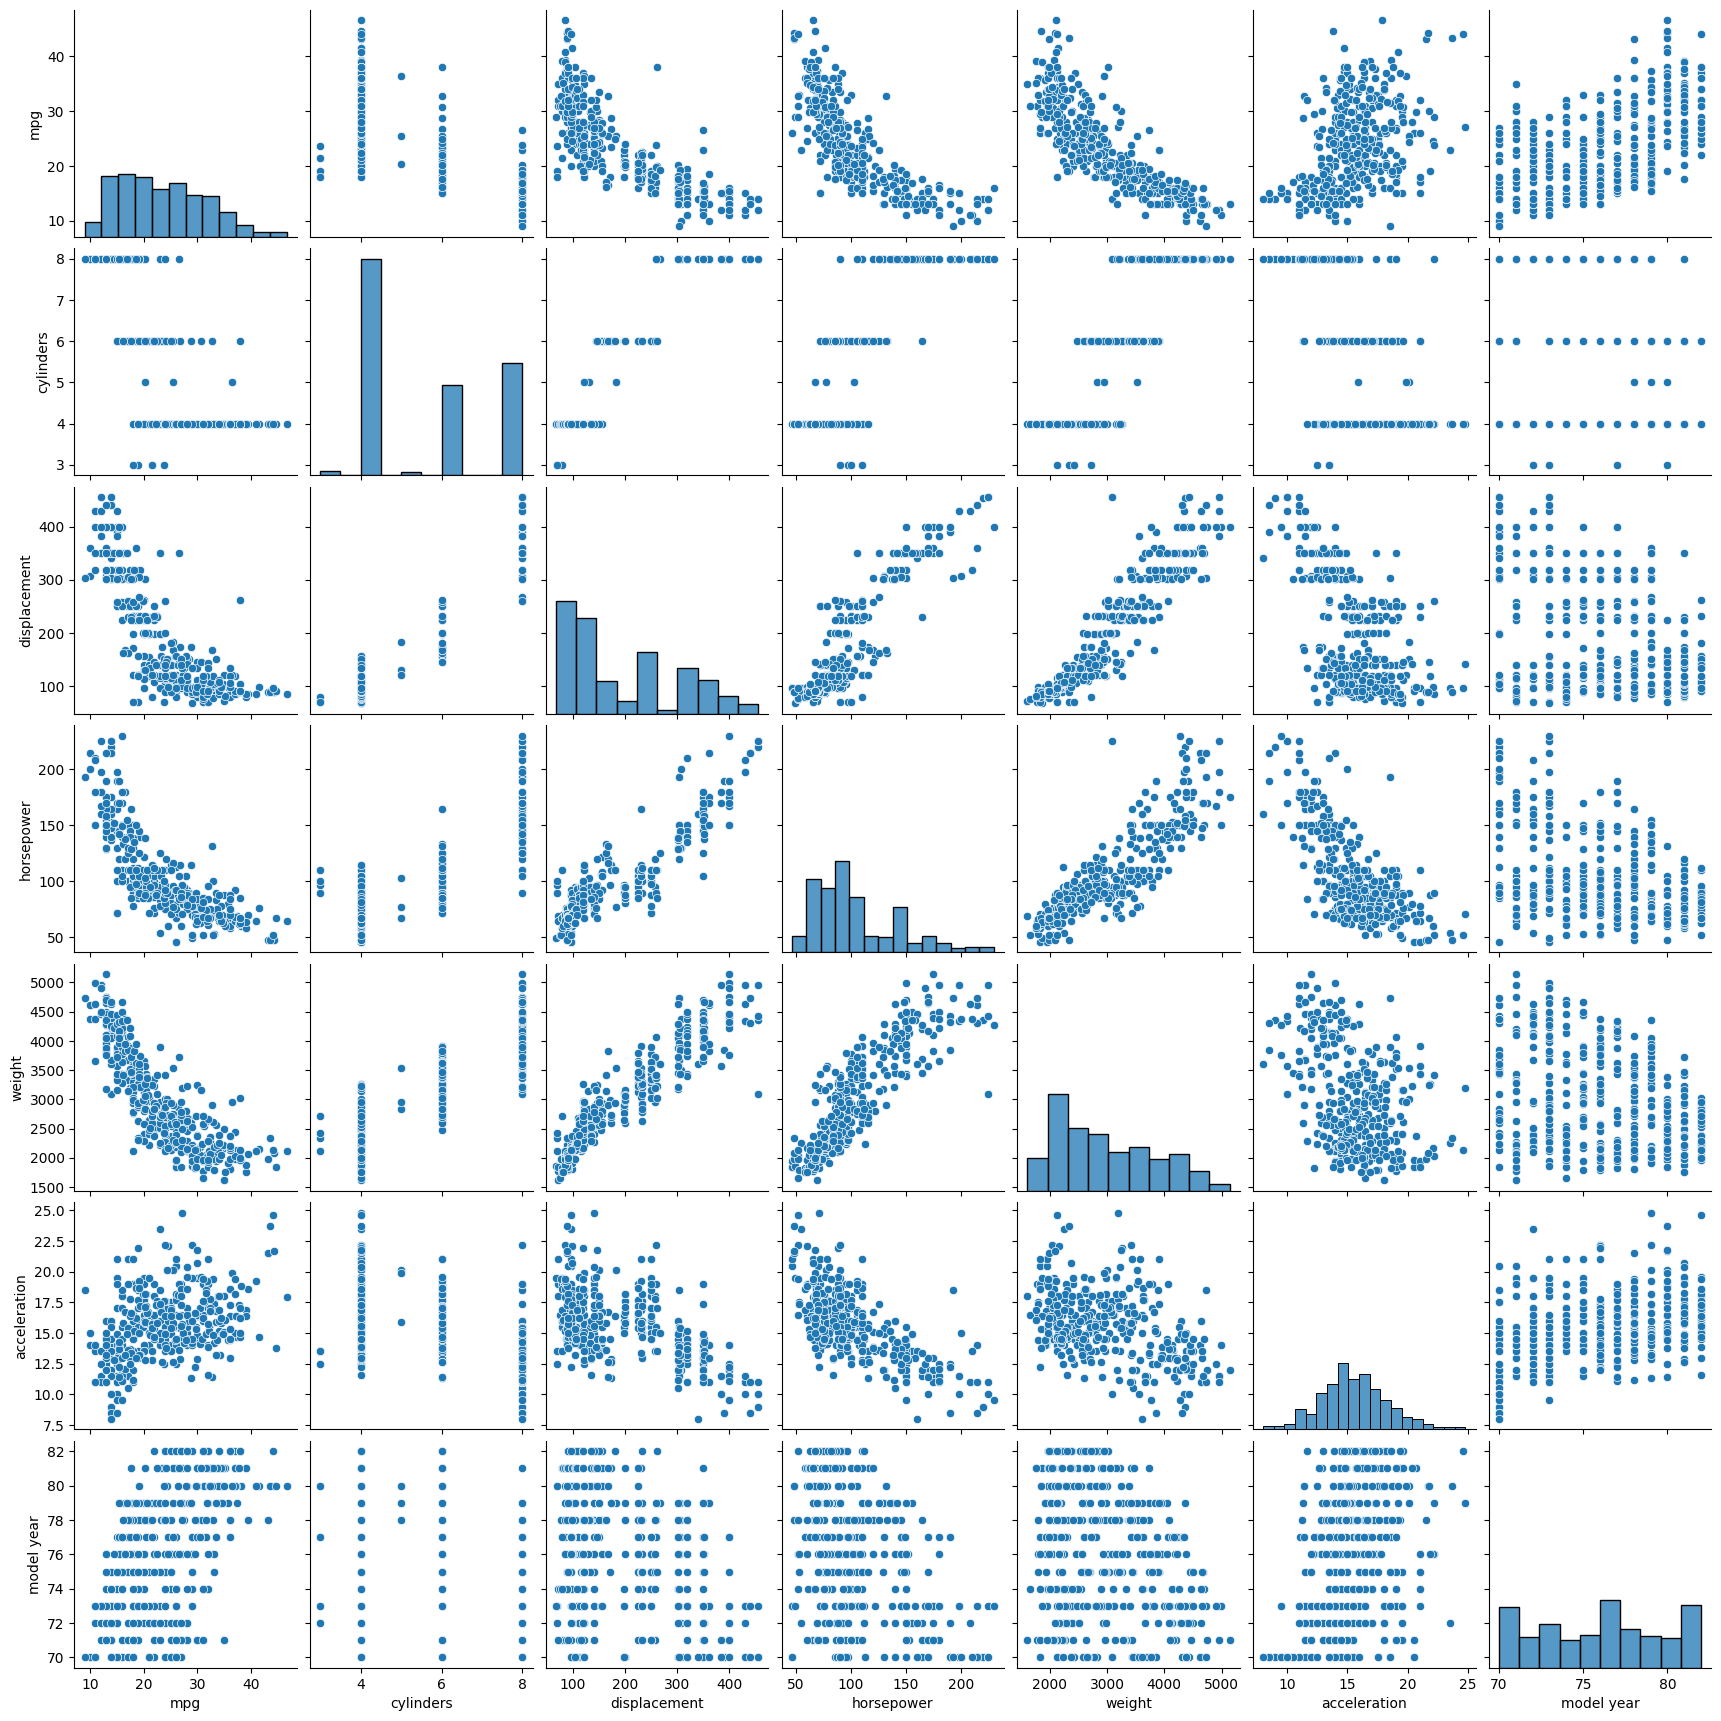

In [17]:
sns.pairplot(auto)

In [18]:
auto=auto.drop('car name',axis=1)

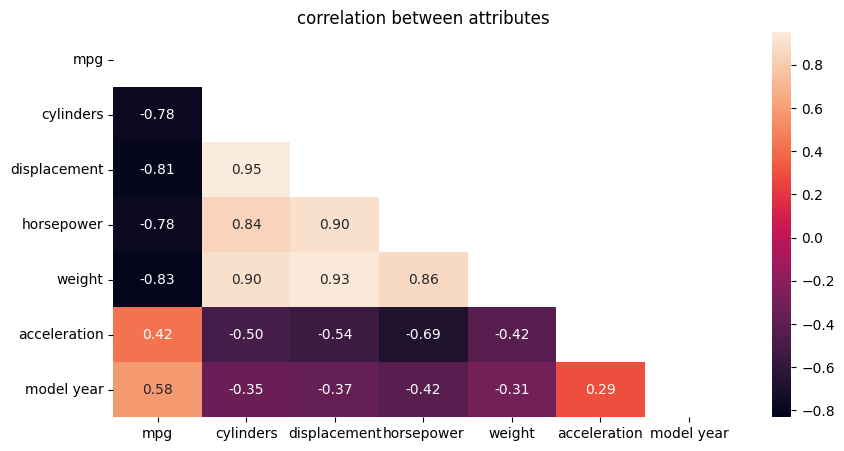

In [19]:
# plotting correlation heatmap
plt.figure(figsize=(10,5))
corr = auto.drop(columns=['origin']).corr()
mask = np.triu(corr)
sns.heatmap(corr, annot= True, mask= mask, fmt = '.2f')
plt.title("correlation between attributes")
plt.show()

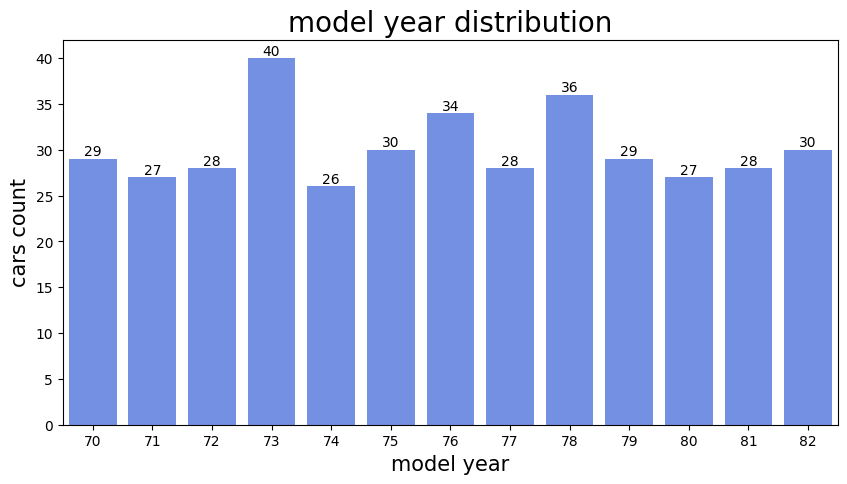

In [20]:
# displaying histgram of model year column
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'model year', data = auto, color = '#6287f4')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("model year distribution", fontsize = 20)
plt.xlabel("model year", fontsize = 15)
plt.ylabel("cars count", fontsize = 15)
plt.show()

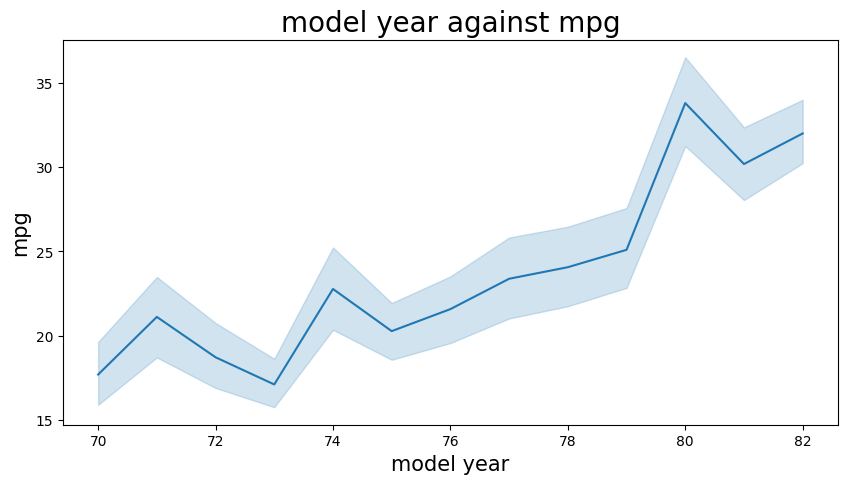

In [21]:
# ploting model year against mpg
plt.figure(figsize=(10,5))
plt.title("model year against mpg", fontsize = 20)
plt.xlabel("model year", fontsize = 15)
plt.ylabel("mpg", fontsize = 15)
sns.lineplot(x = 'model year', y = 'mpg', data = auto);



From the above visualizations, we we may totice the following:

    Our dataset contains info about cars from 1970 to 1982.
    Most of the cars are produced in 1973.
    As years pass after 1973, there has been a noticable increase in mpg.



mpg visual

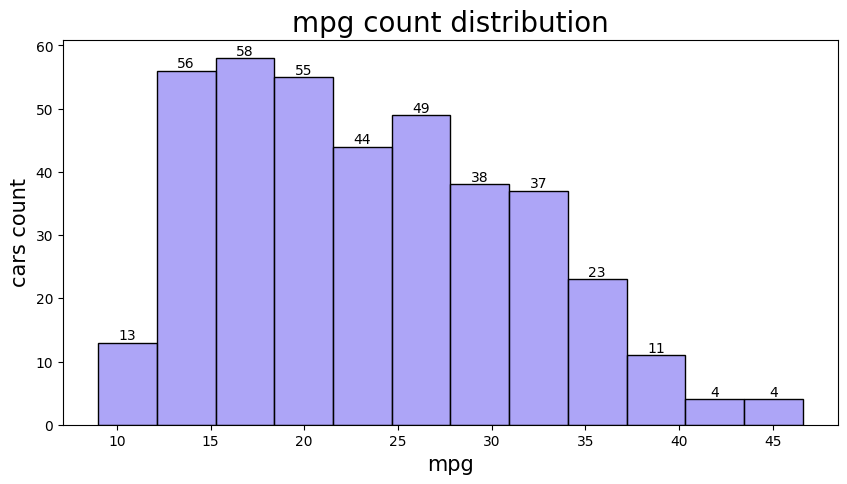

In [22]:
# ploting mpg distribution
plt.figure(figsize=(10,5))
ax = sns.histplot(x = 'mpg', data = auto, color = '#9287f5')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("mpg count distribution", fontsize = 20)
plt.xlabel("mpg", fontsize = 15)
plt.ylabel("cars count", fontsize = 15)
plt.show()

In [23]:
# most of the cars have an avg of 15-25 mpg
#the data is skewed to the right


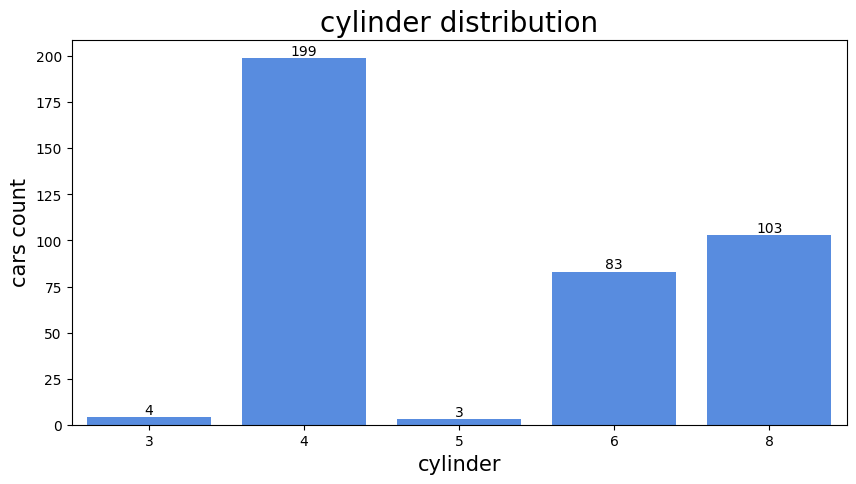

In [24]:
# displaying cylinder column distribution
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'cylinders', data = auto, color = '#4287f5')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("cylinder distribution", fontsize = 20)
plt.xlabel("cylinder", fontsize = 15)
plt.ylabel("cars count", fontsize = 15)
plt.show()

majority in cars have 4 cylinder engine.

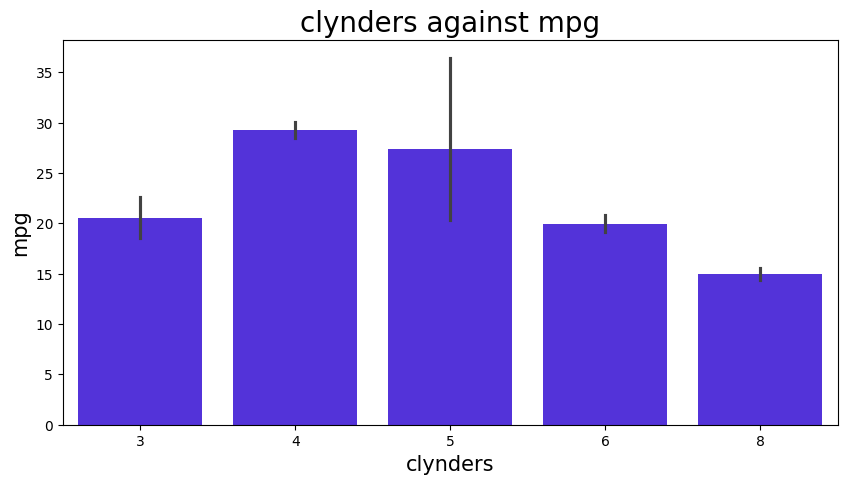

In [26]:
# ploting clynders against mpg
plt.figure(figsize=(10,5))
sns.barplot(x = 'cylinders', y = 'mpg', data = auto, color = '#4217f5')
plt.title("clynders against mpg", fontsize = 20)
plt.xlabel("clynders", fontsize = 15)
plt.ylabel("mpg", fontsize = 15)
plt.show()

Text(0, 0.5, 'horsepower')

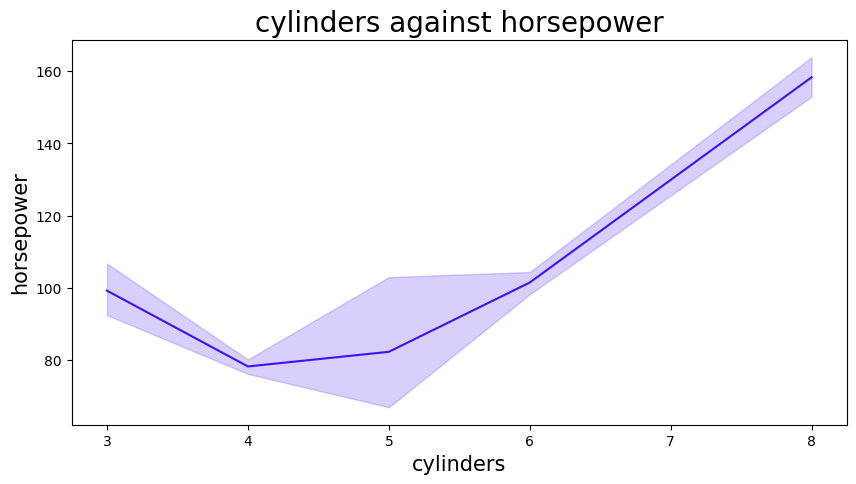

In [28]:
# ploting cylinders anainst horsepower
plt.figure(figsize=(10,5))
sns.lineplot(x='cylinders',y='horsepower',data=auto,color='#4210f5')
plt.title("cylinders against horsepower", fontsize = 20)
plt.xlabel("cylinders", fontsize = 15)
plt.ylabel("horsepower", fontsize = 15)

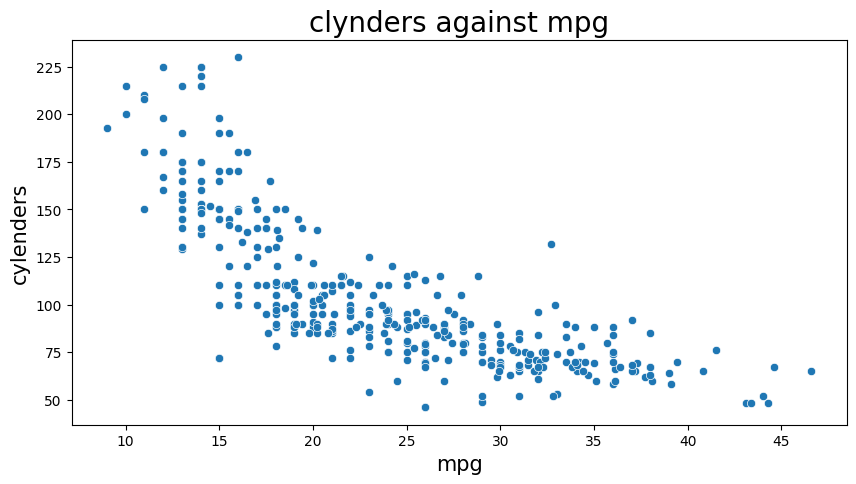

In [30]:
# ploting mpg against horsepower
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'mpg', y = 'horsepower', data = auto,legend='auto')
plt.title("clynders against mpg", fontsize = 20)
plt.xlabel("mpg", fontsize = 15)
plt.ylabel("cylenders", fontsize = 15)
plt.show()

there is negative correlation between mpg and horsepower.

#exploring origin column and find insights about each manufacturing country.

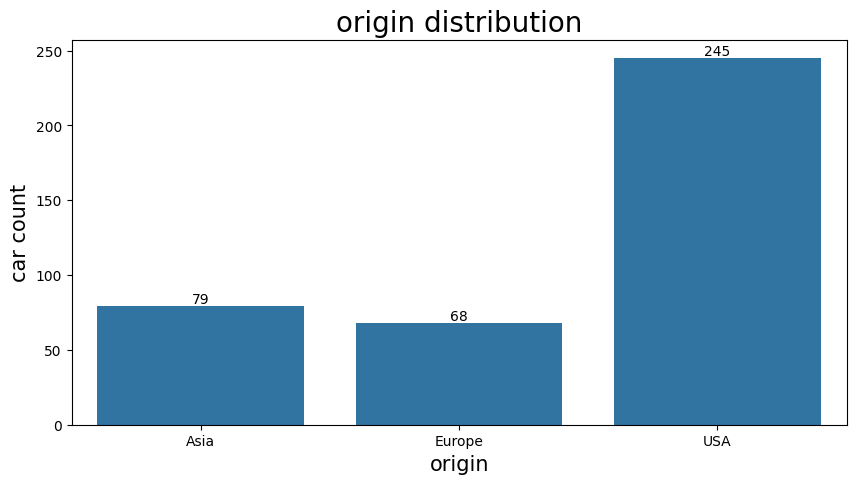

In [31]:
# ploting cars origin dist.
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'origin', data = auto)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("origin distribution", fontsize = 20)
plt.xlabel("origin", fontsize = 15)
plt.ylabel("car count", fontsize = 15)
plt.show()

In [33]:
#Notable: that USA alone produces more than 64% of the total cars in our dataset

#Let's explore its relations between other columns.

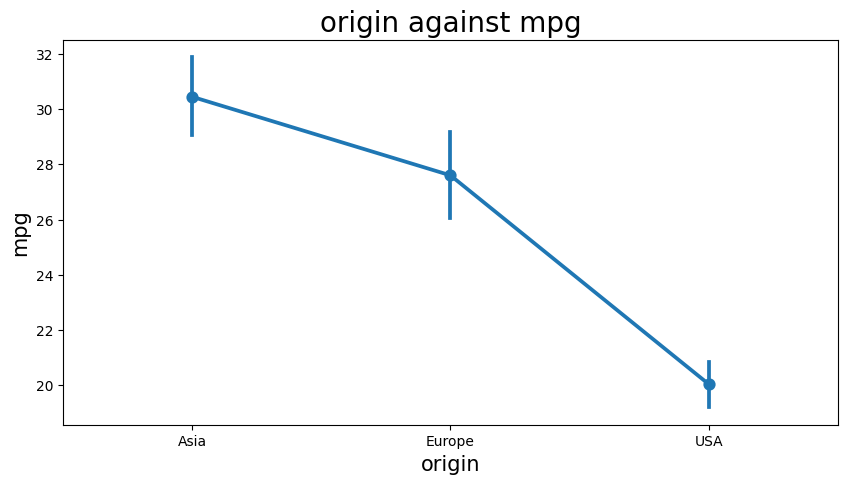

In [34]:
# ploting origin anainst mpg
plt.figure(figsize=(10,5))
sns.pointplot(x = 'origin', y = 'mpg', data = auto)
plt.title("origin against mpg", fontsize = 20)
plt.xlabel("origin", fontsize = 15)
plt.ylabel("mpg", fontsize = 15)
plt.show()

In [35]:
# Althogh USA has the biggest count of our dataset, it produces cars we relatively very low mpg compared to Asia and Europe
#Asia is the leading contry in producing cars with high mpg with a mean close to 30.



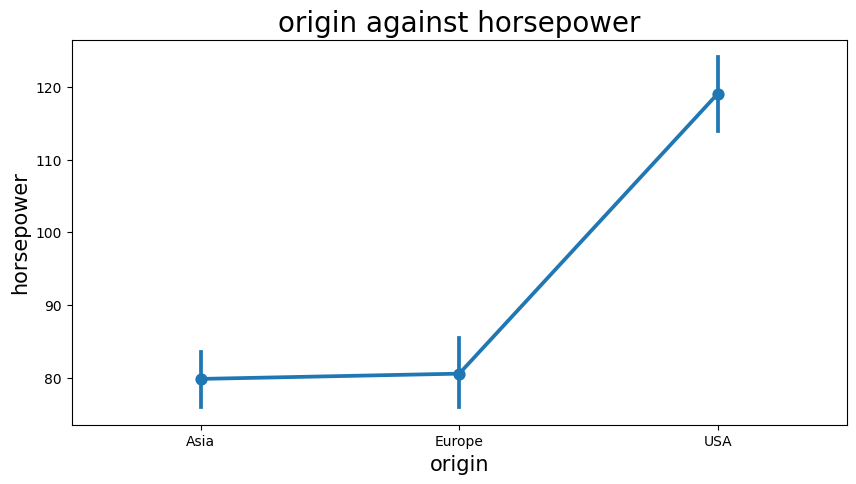

In [37]:
# ploting origin anainst horsepower
plt.figure(figsize=(10,5))
sns.pointplot(x = 'origin', y = 'horsepower', data = auto)
plt.title("origin against horsepower", fontsize = 20)
plt.xlabel("origin", fontsize = 15)
plt.ylabel("horsepower", fontsize = 15)
plt.show()

In [38]:
#As expected, USA has the highest engine horsepower. This implies the previously observed conclusion that hoursepower and mpg has a negative correlation.

<ipython-input-40-a2cb34caa952>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot (x = 'model year', y = 'mpg', hue = 'origin', data = auto, ci =None);


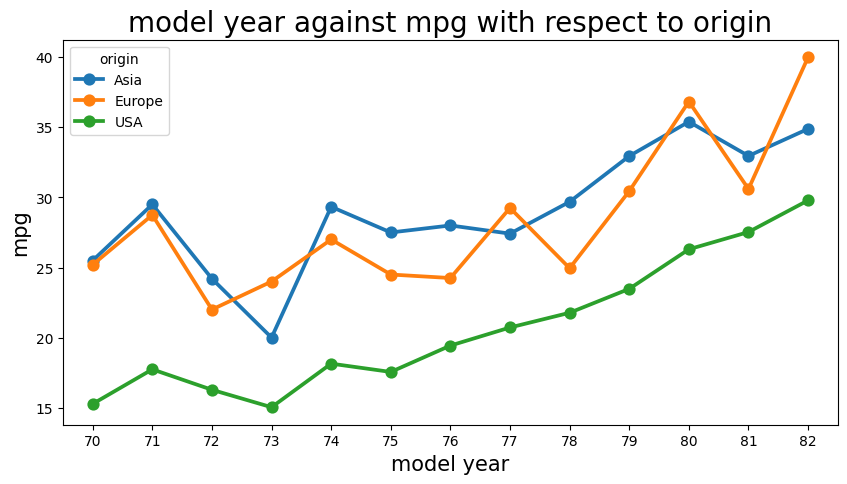

In [40]:
# display model year against mpg with respect to origin
plt.figure(figsize=(10,5))
sns.pointplot (x = 'model year', y = 'mpg', hue = 'origin', data = auto, ci =None);
plt.title("model year against mpg with respect to origin", fontsize = 20)
plt.xlabel("model year", fontsize = 15)
plt.ylabel("mpg", fontsize = 15)
plt.show()

In [42]:
#This chart also implies the positive correlation between model year and mpg, and shows that Asia has been leading country in this industry, followed by Europe and USA comes in the last place.

#Let's now explore how weight has been affecting our car specs over the years.

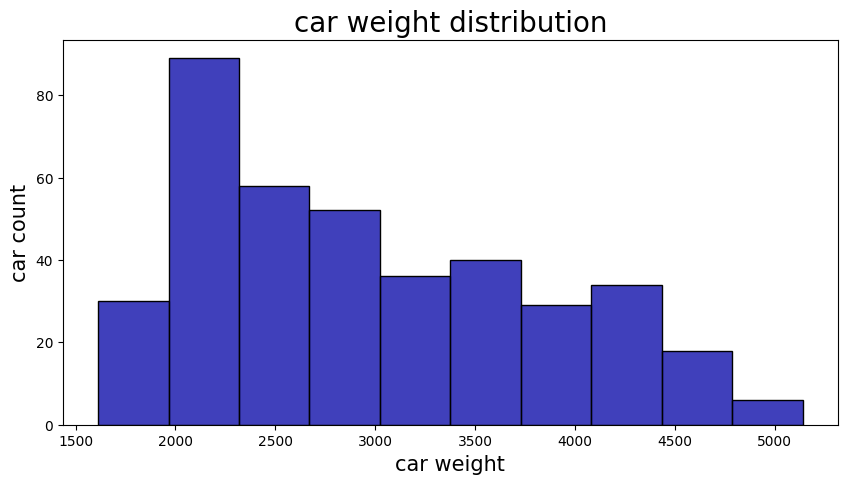

In [55]:
# plot a dist. of car weight
plt.figure(figsize=(10,5))
sns.histplot(x = 'weight', data = auto, color = '#0000a5')
plt.title("car weight distribution", fontsize = 20)
plt.xlabel("car weight", fontsize = 15)
plt.ylabel("car count", fontsize = 15)
plt.show()

<ipython-input-60-428dacf54223>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = 'model year', y = 'weight', data = auto,


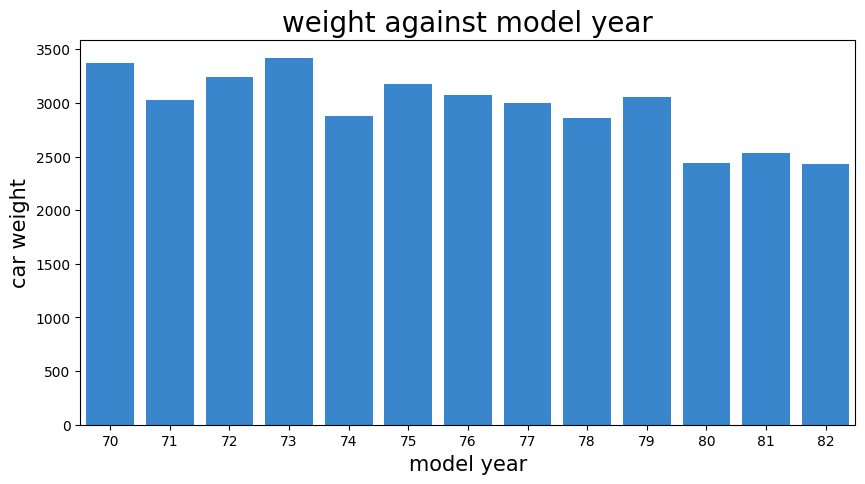

In [60]:
# plotting weight against model year
plt.figure(figsize=(10,5))
ax = sns.barplot(x = 'model year', y = 'weight', data = auto,
                 color = '#2287e5', ci = None)
plt.title("weight against model year", fontsize = 20)
plt.xlabel("model year", fontsize = 15)
plt.ylabel("car weight", fontsize = 15)
plt.show()

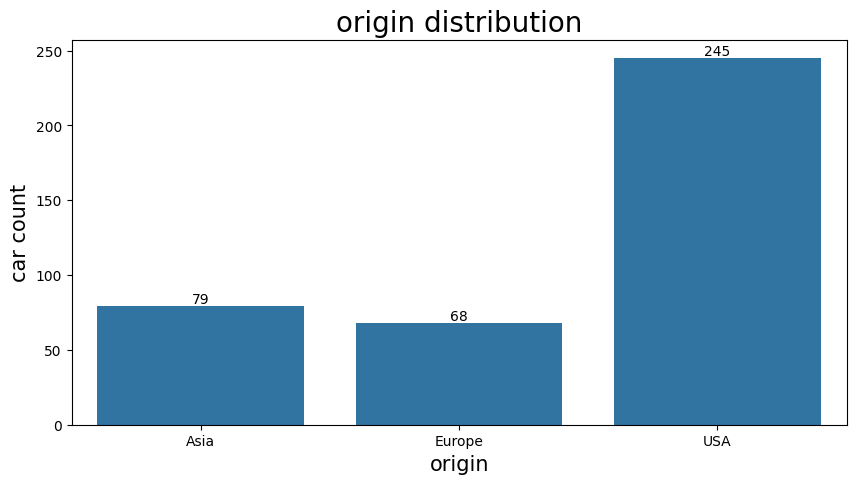

In [61]:
# ploting cars origin dist.
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'origin', data = auto)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("origin distribution", fontsize = 20)
plt.xlabel("origin", fontsize = 15)
plt.ylabel("car count", fontsize = 15)
plt.show()


Conclusion

In this section, we'd add the conclusions we draw from the previous visualisations.

    As years pass after 1973, there has been a noticable increase in mpg.
    As cylinders in the engine increases above 4, MPG decreases and engine horsepower increases. That indicates negative correlation between mpg and horsepower.
    mpg increases as weight decreses over time, that also indecates a stron correlation between them.
    Althogh USA has the biggest count of produced cars, its cars has relatively very low mpg, thus the highest possible weight compared to Asia and Europe
    Asia is the leading contry in producing cars with high mpg with a mean close to 30, and it produces the lightest cars
    Wa can spot a negative correlation between acceleration and horepower, this means that it has a positive one with mpg.

